In [ ]:
#Edgar Moises Hernandez-Gonzalez
#09/07/19
#CNNLSTM2D

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv("Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072].values
y = datos.iloc[:, 3072].values

num_classes = 6
n_samples = len(y)
print(x.shape)
print(y.shape)
print(n_samples)

(132, 3072)
(132,)
132


In [3]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [4]:
#convertir de 2D a 5D
x = x.reshape((n_samples, 1, 1, 512, 6))
print(x.shape)

(132, 1, 1, 512, 6)


In [5]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [6]:
model = models.Sequential()
model.add(layers.ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(1,1,512,6)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 510, 64)        54016     
_________________________________________________________________
dropout (Dropout)            (None, 1, 510, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32640)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               3264100   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 3,318,722
Trainable params: 3,318,722
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 99, validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/20
99/99 [==============================] - 5s 52ms/sample - loss: 1.7908 - acc: 0.2121 - val_loss: 1.7968 - val_acc: 0.2121
Epoch 2/20
99/99 [==============================] - 0s 2ms/sample - loss: 1.5806 - acc: 0.3939 - val_loss: 1.8411 - val_acc: 0.1515
Epoch 3/20
99/99 [==============================] - 0s 2ms/sample - loss: 1.2572 - acc: 0.7980 - val_loss: 1.8272 - val_acc: 0.0909
Epoch 4/20
99/99 [==============================] - 0s 2ms/sample - loss: 0.9518 - acc: 0.8990 - val_loss: 1.8540 - val_acc: 0.1515
Epoch 5/20
99/99 [==============================] - 0s 2ms/sample - loss: 0.6979 - acc: 0.9495 - val_loss: 1.9641 - val_acc: 0.1818
Epoch 6/20
99/99 [==============================] - 0s 2ms/sample - loss: 0.4742 - acc: 0.9697 - val_loss: 2.0953 - val_acc: 0.1515
Epoch 7/20
99/99 [==============================] - 0s 2ms/sample - loss: 0.3130 - acc: 0.9899 - val_loss: 2.1698 - val_acc: 0.1212
Epoch 8/20
99/99 [=============

In [10]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 1ms/sample - loss: 4.2145 - acc: 0.0909
Test loss: 4.214531942298918
Test accuracy: 0.09090909


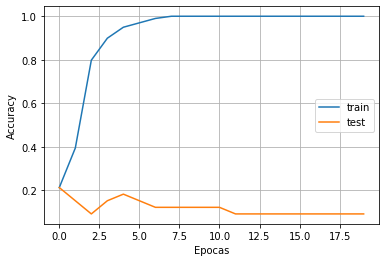

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

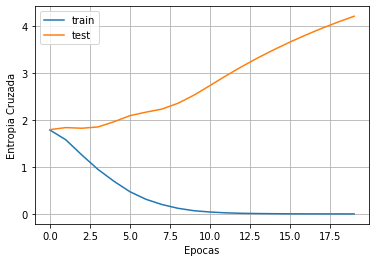

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()